In [194]:
# Source code : Bradford council casualty analysis
# Date Written : 30-11-2023 - 05-12-2023
# Programmer : Anish Vattemkuzhyil Appukuttan
# Description : This notebook does basic Descriptive Statistics, data cleansing,one-hot encoding of categorical variables, correlation analysis, 
# Predicting  casualty severity using casualty imd decile (Index of Multiple Deprivation) using Random Forest and Logistic Regression
# trying PCA analysis etc


In [195]:
# Loading the casualties file from desktop using pandas
import pandas as pd

df = pd.read_csv('C:/Users/44743/Desktop/Data Science/Bedford/bfd_casualties.csv')
print(df)


     accident_index  accident_year accident_reference  vehicle_reference  \
0     2018140000000           2018          135110070                  1   
1     2018140000000           2018          135111193                  2   
2     2018140000000           2018          135121185                  1   
3     2018140000000           2018          135131754                  1   
4     2018140000000           2018          135131777                  1   
...             ...            ...                ...                ...   
3345  2020137CT0659           2020          137CT0659                  1   
3346  2020137CT0659           2020          137CT0659                  1   
3347  2020137CT0659           2020          137CT0659                  1   
3348  2020137CT0659           2020          137CT0659                  2   
3349  2020137CV1840           2020          137CV1840                  1   

      casualty_reference   casualty_class sex_of_casualty age_of_casualty  \
0         

In [196]:
# Verifying the details of data frame (only the head records)
print(df.head())

  accident_index  accident_year accident_reference  vehicle_reference  \
0  2018140000000           2018          135110070                  1   
1  2018140000000           2018          135111193                  2   
2  2018140000000           2018          135121185                  1   
3  2018140000000           2018          135131754                  1   
4  2018140000000           2018          135131777                  1   

   casualty_reference   casualty_class sex_of_casualty age_of_casualty  \
0                   1        Passenger            Male             NaN   
1                   1  Driver or rider            Male             NaN   
2                   1       Pedestrian            Male             NaN   
3                   1  Driver or rider            Male             NaN   
4                   1  Driver or rider            Male             NaN   

  age_band_of_casualty casualty_severity                 pedestrian_location  \
0              16 - 20            Sl

In [197]:
# Cross checking the number of fields with Null values for data cleaning. We could see age_of_casualty column in the data 
# frame has null values.
print(df.isnull().sum())


accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                          0
age_of_casualty                       3345
age_band_of_casualty                     0
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                            0
bus_or_coach_passenger                   0
pedestrian_road_maintenance_worker       0
casualty_type                            0
casualty_home_area_type                  0
casualty_imd_decile                      0
dtype: int64


In [198]:
# This cell of this notebook does data conversion. The accident_index field has scientific notation 'E' because of its big
# value. So a localised function 'convert_accident_index' is been created to convert the accident_index to number.So this
# way we will be able to link this column as a Foreign key to the other sheets crashes and vehicles.

import pandas as pd

# Loading  the DataFrame
df = pd.read_csv('C:/Users/44743/Desktop/Data Science/Bedford/bfd_casualties.csv')

# This is the local function which discussed in the begining 
def convert_accident_index(value):
    try:
        # Check if value is in scientific notation by attempting to convert to float
        float_val = float(value)
        # Use string formatting to convert to full number string
        return '{:.0f}'.format(float_val)
    except ValueError:
        # If conversion fails, return the value as is
        return value

# Applying  the conversion function to each value in the accident_index column
df['accident_index'] = df['accident_index'].apply(convert_accident_index)

# Displaying the first few rows to check whether the conversion was succesful or not
print(df['accident_index'].head())


0    2018140000000
1    2018140000000
2    2018140000000
3    2018140000000
4    2018140000000
Name: accident_index, dtype: object


In [199]:
df

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2018140000000,2018,135110070,1,1,Passenger,Male,NaN,16 - 20,Slight,Not a Pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Data missing or out of range,Data missing or out of range
1,2018140000000,2018,135111193,2,1,Driver or rider,Male,NaN,46 - 55,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,Urban area,Least deprived 10%
2,2018140000000,2018,135121185,1,1,Pedestrian,Male,NaN,Over 75,Slight,"In carriageway, crossing elsewhere",Crossing from driver's offside,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,Data missing or out of range,Data missing or out of range
3,2018140000000,2018,135131754,1,1,Driver or rider,Male,NaN,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Less deprived 40-50%
4,2018140000000,2018,135131777,1,1,Driver or rider,Male,NaN,16 - 20,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 40-50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,2020137CT0659,2020,137CT0659,1,2,Driver or rider,Female,NaN,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%
3346,2020137CT0659,2020,137CT0659,1,3,Passenger,Male,NaN,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%
3347,2020137CT0659,2020,137CT0659,1,4,Passenger,Female,NaN,06-Oct,Slight,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%
3348,2020137CT0659,2020,137CT0659,2,1,Driver or rider,Female,NaN,21 - 25,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%


In [200]:
# In this cell doing the normalization of age_band_of_casualty. Means, any age in the format of '16 - 20' or in this
# format, we will take the median age. So we get a unique age than age band



import pandas as pd

# Local function to convert the above said age band processing
def calculate_median_age(age_band):
    # Split the age_band string and convert to integers
    ages = age_band.split(' - ')
    if len(ages) == 2:
        lower_age, upper_age = int(ages[0]), int(ages[1])
        return (lower_age + upper_age) // 2
    return None

# Applying this function to age_band_of_casualty and create a new column for median ages
df['median_age_band'] = df['age_band_of_casualty'].apply(calculate_median_age)

# Replacing NaN values in age_of_casualty with the value in median_age_band
df['age_of_casualty'] = df.apply(
    lambda row: row['median_age_band'] if pd.isna(row['age_of_casualty']) else row['age_of_casualty'],
    axis=1
)

# Droping the temporary median_age_band column because we dont need this temporary column as it was not present in the 
# orginal data set
df.drop('median_age_band', axis=1, inplace=True)

# Displaying the first few rows to check
print(df.head())


  accident_index  accident_year accident_reference  vehicle_reference  \
0  2018140000000           2018          135110070                  1   
1  2018140000000           2018          135111193                  2   
2  2018140000000           2018          135121185                  1   
3  2018140000000           2018          135131754                  1   
4  2018140000000           2018          135131777                  1   

   casualty_reference   casualty_class sex_of_casualty age_of_casualty  \
0                   1        Passenger            Male            18.0   
1                   1  Driver or rider            Male            50.0   
2                   1       Pedestrian            Male             NaN   
3                   1  Driver or rider            Male            30.0   
4                   1  Driver or rider            Male            18.0   

  age_band_of_casualty casualty_severity                 pedestrian_location  \
0              16 - 20            Sl

In [201]:
import pandas as pd
import re

# Sample DataFrame loading
# df = pd.read_csv('C:/Users/44743/Desktop/Data Science/Bedford/bfd_casualties.csv')

def calculate_median_age(age_band):
    # Check for 'Over' pattern (e.g., 'Over 75')
    if 'Over' in age_band:
        return int(re.findall(r'\d+', age_band)[0])

    # Check for patterns like 'Nov-15', '06-Oct'
    elif '-' in age_band:
        return int(re.findall(r'\d+', age_band)[-1])

    # Standard age range like '16 - 20'
    else:
        ages = age_band.split(' - ')
        if len(ages) == 2:
            lower_age, upper_age = int(ages[0]), int(ages[1])
            return (lower_age + upper_age) // 2
        return None

# Applying this function to age_band_of_casualty and creating a new column for median ages
df['median_age_band'] = df['age_band_of_casualty'].apply(calculate_median_age)

# Replacing NaN values in age_of_casualty with the value in median_age_band
df['age_of_casualty'] = df.apply(
    lambda row: row['median_age_band'] if pd.isna(row['age_of_casualty']) else row['age_of_casualty'],
    axis=1
)

# Droping the temporary median_age_band column. Just like the previous time we did
df.drop('median_age_band', axis=1, inplace=True)

# Displaying the first few rows to check
print(df.head())


  accident_index  accident_year accident_reference  vehicle_reference  \
0  2018140000000           2018          135110070                  1   
1  2018140000000           2018          135111193                  2   
2  2018140000000           2018          135121185                  1   
3  2018140000000           2018          135131754                  1   
4  2018140000000           2018          135131777                  1   

   casualty_reference   casualty_class sex_of_casualty age_of_casualty  \
0                   1        Passenger            Male            18.0   
1                   1  Driver or rider            Male            50.0   
2                   1       Pedestrian            Male            75.0   
3                   1  Driver or rider            Male            30.0   
4                   1  Driver or rider            Male            18.0   

  age_band_of_casualty casualty_severity                 pedestrian_location  \
0              16 - 20            Sl

In [202]:
df

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2018140000000,2018,135110070,1,1,Passenger,Male,18.0,16 - 20,Slight,Not a Pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Data missing or out of range,Data missing or out of range
1,2018140000000,2018,135111193,2,1,Driver or rider,Male,50.0,46 - 55,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,Urban area,Least deprived 10%
2,2018140000000,2018,135121185,1,1,Pedestrian,Male,75.0,Over 75,Slight,"In carriageway, crossing elsewhere",Crossing from driver's offside,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,Data missing or out of range,Data missing or out of range
3,2018140000000,2018,135131754,1,1,Driver or rider,Male,30.0,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Less deprived 40-50%
4,2018140000000,2018,135131777,1,1,Driver or rider,Male,18.0,16 - 20,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 40-50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,2020137CT0659,2020,137CT0659,1,2,Driver or rider,Female,30.0,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%
3346,2020137CT0659,2020,137CT0659,1,3,Passenger,Male,40.0,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%
3347,2020137CT0659,2020,137CT0659,1,4,Passenger,Female,6.0,06-Oct,Slight,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%
3348,2020137CT0659,2020,137CT0659,2,1,Driver or rider,Female,23.0,21 - 25,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%


In [203]:

columns = df.columns
print(columns)


Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')


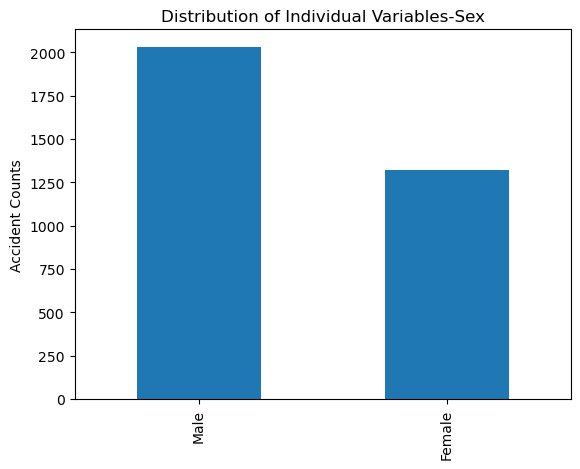

In [204]:
import matplotlib.pyplot as plt


df['sex_of_casualty'].value_counts().plot(kind='bar')

# Labelling the plots
plt.ylabel('Accident Counts')
plt.title('Distribution of Individual Variables-Sex')

# Displaying the plot
plt.show()


<AxesSubplot:title={'center':'Distribution of Individual Variables-Age'}, xlabel='Age', ylabel='Accident Counts'>

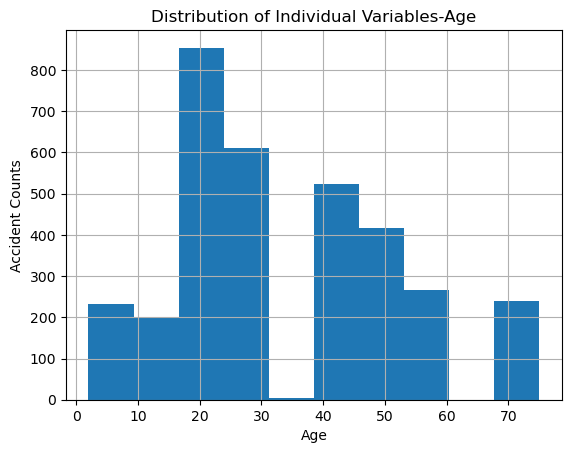

In [205]:
df['age_of_casualty'] = pd.to_numeric(df['age_of_casualty'], errors='coerce')
# Option 1: Fill NaN with a value (e.g., mean, median, or a constant like 0)
df['age_of_casualty'].fillna(df['age_of_casualty'].mean(), inplace=True)

# Option 2: Drop rows with NaN
df.dropna(subset=['age_of_casualty'], inplace=True)
# Adding a label to the y-axis
plt.xlabel('Age')
plt.ylabel('Accident Counts')
plt.title('Distribution of Individual Variables-Age')
df['age_of_casualty'].hist()


<AxesSubplot:>

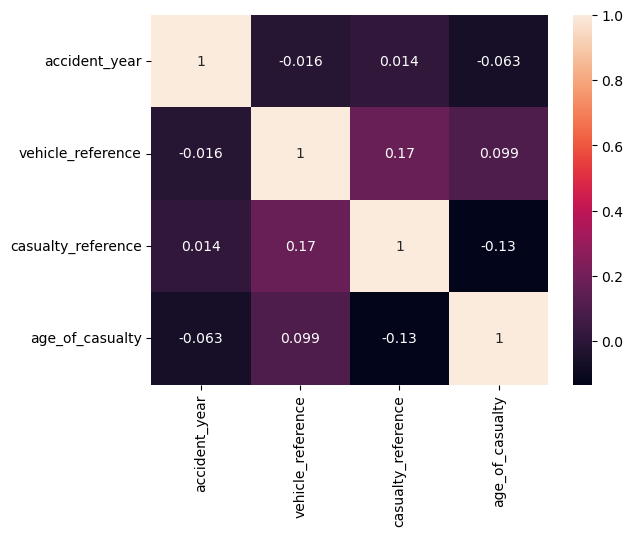

In [206]:
# Correlation Matrix. This matrix can be ignored as only age_of_casualty is bit meaningful, but still that too negaticve correlation
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

Text(0.5, 1.0, 'Correlation of Age of casualty and Accident Severity')

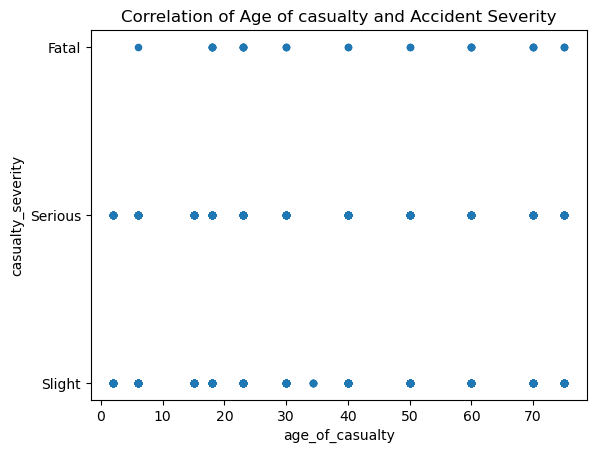

In [207]:
#This is one Bivariate analysis done in the PPT.
# Scatter Plot 
df.plot.scatter(x='age_of_casualty', y='casualty_severity')
plt.title('Correlation of Age of casualty and Accident Severity')

In [208]:
# Frequency distribution of casualty severity per year
severity_distribution_per_year = df.groupby('accident_year')['casualty_severity'].value_counts()
print(severity_distribution_per_year)


accident_year  casualty_severity
2018           Slight               1114
               Serious               166
               Fatal                  15
2019           Slight                949
               Serious               159
               Fatal                   9
2020           Slight                774
               Serious               156
               Fatal                   8
Name: casualty_severity, dtype: int64


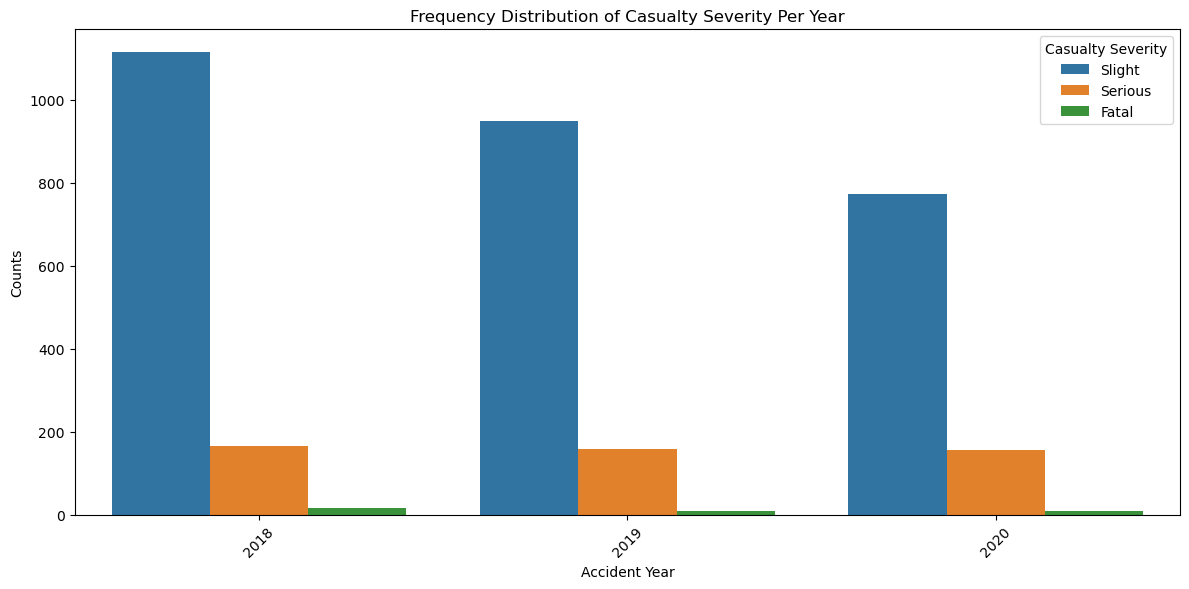

In [209]:
#Analyzing Trends Over Time

import matplotlib.pyplot as plt
import seaborn as sns



# Converting the Series to a DataFrame
severity_distribution_df = severity_distribution_per_year.reset_index(name='counts')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=severity_distribution_df, x='accident_year', y='counts', hue='casualty_severity')

plt.title('Frequency Distribution of Casualty Severity Per Year')
plt.xlabel('Accident Year')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Casualty Severity')
plt.tight_layout()
plt.show()


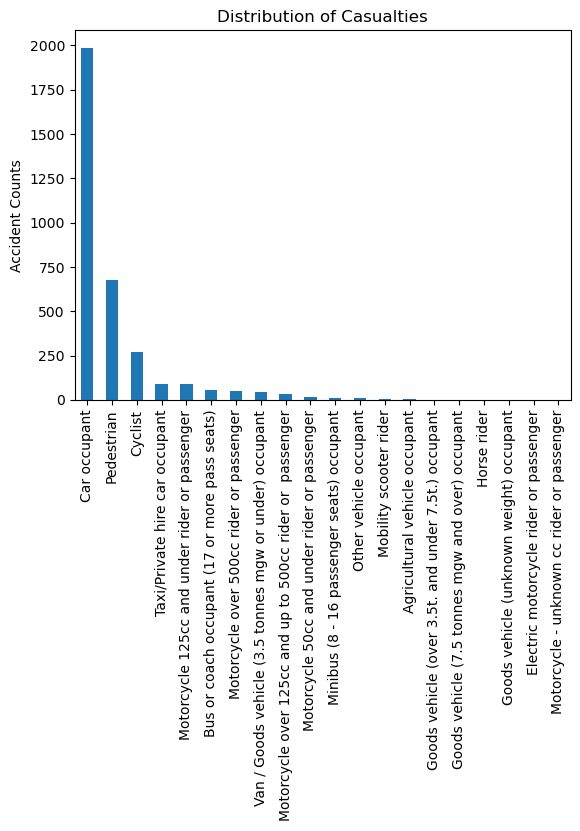

In [210]:
import matplotlib.pyplot as plt


df['casualty_type'].value_counts().plot(kind='bar')

# Adding y-axis label
plt.ylabel('Accident Counts')

plt.title('Distribution of Casualties')


plt.show()


In [211]:
# Checking any null values are there or not 
print(df.isnull().sum())


accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64


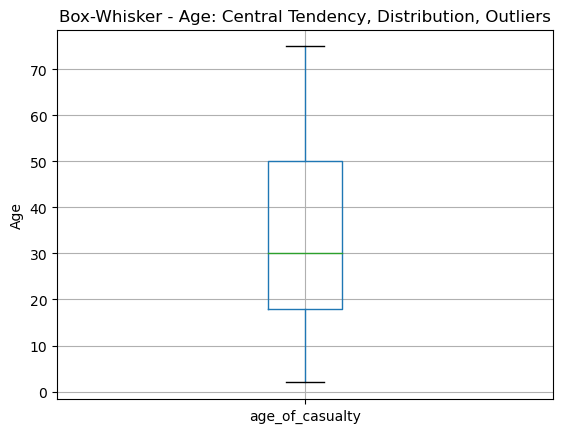

In [212]:
# This is also been used in the PPT to explain various statistical factors in the PPT
import matplotlib.pyplot as plt


df.boxplot(column='age_of_casualty')


plt.ylabel('Age')


plt.title('Box-Whisker - Age: Central Tendency, Distribution, Outliers')


plt.show()


<AxesSubplot:>

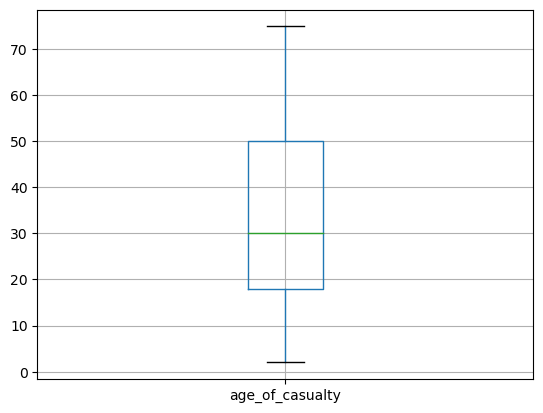

In [213]:
#Anomalies/Outliers Detection
df.boxplot(column='age_of_casualty')



In [214]:
#####finding 1
#displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can also reveal any outliers in the data set.
# Central Tendency: The median (the green line within the box) appears to be around 30 years. This suggests that half of the casualties are younger than 30 and the other half are older.
# Spread: The interquartile range (IQR), which is the box's height, spans from roughly 20 to about 50 years. This indicates that the middle 50% of the data is distributed within this range
# Symmetry: The median is closer to the third quartile than the first quartile, suggesting that the distribution of ages is slightly skewed to the right, meaning there are relatively more younger casualties than older ones.


In [215]:
df

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2018140000000,2018,135110070,1,1,Passenger,Male,18.0,16 - 20,Slight,Not a Pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Data missing or out of range,Data missing or out of range
1,2018140000000,2018,135111193,2,1,Driver or rider,Male,50.0,46 - 55,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,Urban area,Least deprived 10%
2,2018140000000,2018,135121185,1,1,Pedestrian,Male,75.0,Over 75,Slight,"In carriageway, crossing elsewhere",Crossing from driver's offside,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,Data missing or out of range,Data missing or out of range
3,2018140000000,2018,135131754,1,1,Driver or rider,Male,30.0,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Less deprived 40-50%
4,2018140000000,2018,135131777,1,1,Driver or rider,Male,18.0,16 - 20,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 40-50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,2020137CT0659,2020,137CT0659,1,2,Driver or rider,Female,30.0,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%
3346,2020137CT0659,2020,137CT0659,1,3,Passenger,Male,40.0,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%
3347,2020137CT0659,2020,137CT0659,1,4,Passenger,Female,6.0,06-Oct,Slight,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%
3348,2020137CT0659,2020,137CT0659,2,1,Driver or rider,Female,23.0,21 - 25,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Most deprived 10%


In [216]:
df['pedestrian_location'].unique()

array(['Not a Pedestrian', 'In carriageway, crossing elsewhere',
       'On footway or verge', 'In carriageway, not crossing',
       'Unknown or other', 'Crossing on pedestrian crossing facility',
       'In centre of carriageway - not on refuge, island or central reservation',
       'Crossing elsewhere within 50m. of pedestrian crossing',
       'Crossing in zig-zag approach lines',
       'On refuge, central island or central reservation'], dtype=object)

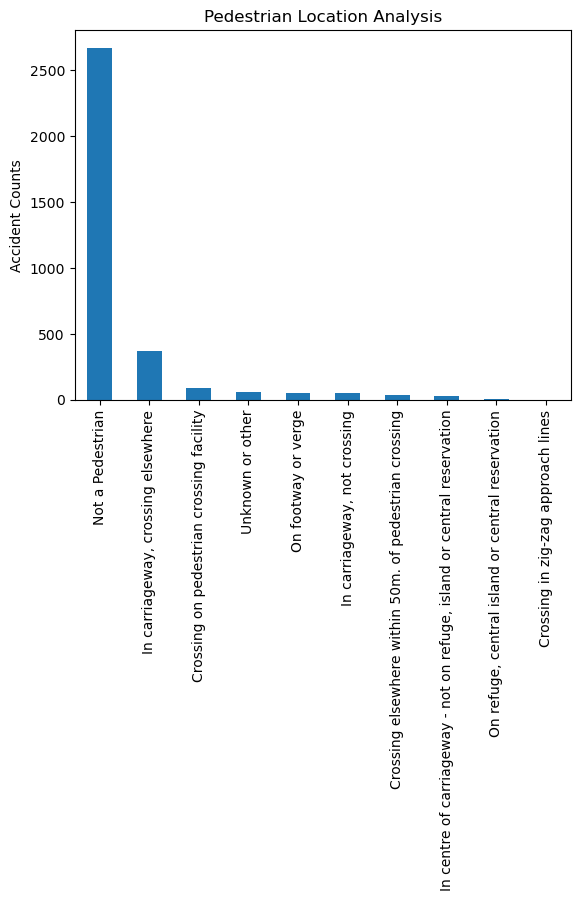

In [217]:
import matplotlib.pyplot as plt

df['pedestrian_location'].value_counts().plot(kind='bar')

plt.ylabel('Accident Counts')

plt.title('Pedestrian Location Analysis')

plt.show()


<AxesSubplot:>

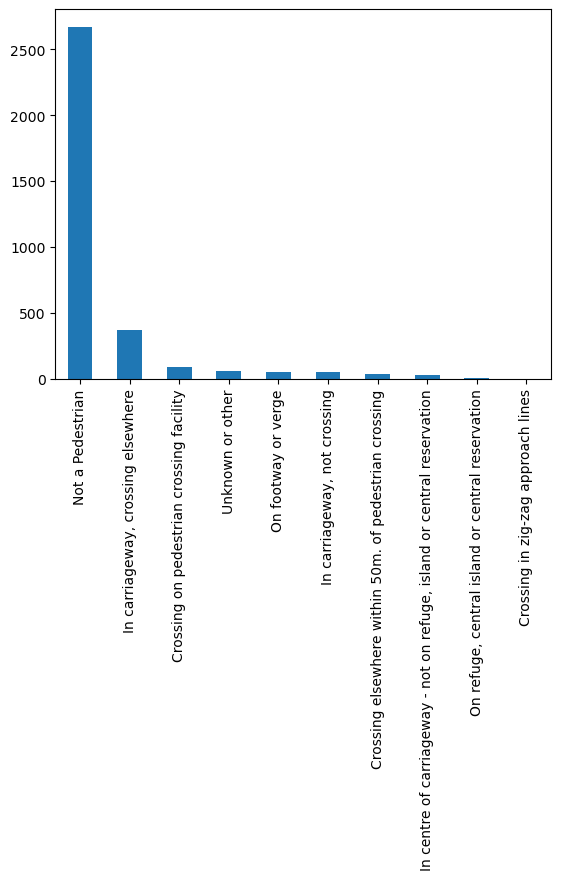

In [218]:
df['pedestrian_location'].value_counts().plot(kind='bar')

In [219]:
#####Finding 2
# In carriageway, crossing elsewhere is high in number which means a pedestrian being located on the road itself, but crossing the road at a point that is not designated for pedestrian crossing, such as a zebra crossing, pelican crossing, footbridge, underpass, or intersection with traffic signals
# Action : More strict rules and public awareness should be made and new rules to punish such people just like signal crossing
# has to be imposed

In [220]:
#An array of unique values from the pedestrian_movement column where the corresponding pedestrian_location is 'In carriageway, crossing elsewhere'



# Filtering  the DataFrame for rows where pedestrian_location is 'In carriageway, crossing elsewhere'
filtered_df = df[df['pedestrian_location'] == 'In carriageway, crossing elsewhere']

# Geting the count of each unique value in the pedestrian_movement column for these filtered rows
movement_counts = filtered_df['pedestrian_movement'].value_counts()

print(movement_counts)



Crossing from driver's nearside                                    172
Crossing from driver's offside                                     100
Crossing from nearside - masked by parked or stationary vehicle     46
Unknown or other                                                    33
Crossing from offside - masked by  parked or stationary vehicle     22
Name: pedestrian_movement, dtype: int64


In [221]:
#Analysis of Index of Multiple Deprivation (IMD). This is very important part as the same shows the socioeconomic side

In [222]:
unique_values = df['casualty_imd_decile'].unique()
print("Unique values in casualty_imd_decile:", unique_values)


Unique values in casualty_imd_decile: ['Data missing or out of range' 'Least deprived 10%'
 'Less deprived 40-50%' 'More deprived 40-50%' 'Most deprived 10%'
 'Less deprived 20-30%' 'More deprived 20-30%' 'Less deprived 30-40%'
 'More deprived 30-40%' 'More deprived 10-20%' 'Less deprived 10-20%']


In [223]:
value_counts = df['casualty_imd_decile'].value_counts()
print("Counts of each IMD Decile:\n", value_counts)


Counts of each IMD Decile:
 Most deprived 10%               1250
More deprived 20-30%             367
More deprived 10-20%             314
Data missing or out of range     297
More deprived 30-40%             257
More deprived 40-50%             212
Less deprived 40-50%             199
Less deprived 30-40%             143
Less deprived 20-30%             130
Less deprived 10-20%              94
Least deprived 10%                87
Name: casualty_imd_decile, dtype: int64


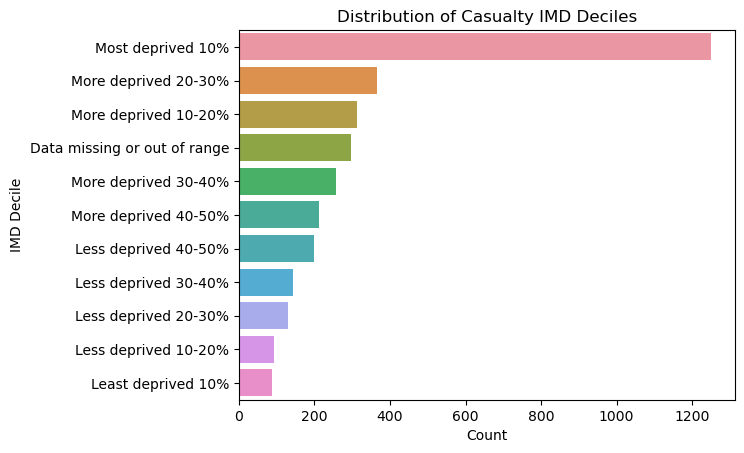

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, y='casualty_imd_decile', order = df['casualty_imd_decile'].value_counts().index)
plt.title('Distribution of Casualty IMD Deciles')
plt.xlabel('Count')
plt.ylabel('IMD Decile')
plt.show()


In [225]:
##### Finding 3 
#Most Common Decile: The "Least deprived 10%" category has the highest count, suggesting that within this dataset, the highest number of casualties occur in the least deprived decile. This is an interesting finding as one might typically expect more accidents in more deprived areas due to factors like less safe infrastructure or higher exposure to risk factors.
# Most Deprived 10%: People living in these areas are often facing tougher socioeconomic conditions, including higher poverty rates, higher unemployment, poorer health, lower educational levels, higher crime rates, and poorer quality housing and environment

In [226]:
import pandas as pd
from scipy.stats import spearmanr

# Maping IMD decile values to a numeric scale
imd_decile_mapping = {
    'Least deprived 10%': 1,
    'Less deprived 10-20%': 2,
    'Less deprived 20-30%': 3,
    'Less deprived 30-40%':4,
    'Less deprived 40-50%':5,
    'More deprived 40-50%':6,
    'More deprived 30-40%':7,
    'More deprived 20-30%':8,
    'More deprived 10-20%':9,    
    'Most deprived 10%': 10
    
}

severity_mapping = {
    'Slight': 1,
    'Serious': 2,
    'Fatal': 3
}

# Applying mappings
df['casualty_imd_decile_numeric'] = df['casualty_imd_decile'].map(imd_decile_mapping)
df['casualty_severity_numeric'] = df['casualty_severity'].map(severity_mapping)

# Droping rows with NaN values in either new numeric column
df.dropna(subset=['casualty_imd_decile_numeric', 'casualty_severity_numeric'], inplace=True)

# Performing Spearman's rank correlation
correlation, p_value = spearmanr(df['casualty_imd_decile_numeric'], df['casualty_severity_numeric'])

print(f"Spearman correlation: {correlation}, P-value: {p_value}")


Spearman correlation: 0.02910843265909154, P-value: 0.10782680693730558


In [227]:
##### Finding 4
# The output from the Spearman correlation calculation indicates that there is a weak negative correlation between casualty_imd_decile_numeric and casualty_severity_numeric with a correlation coefficient of approximately -0.029. The negative sign suggests that as the IMD decile increases (which means moving from less deprived to more deprived), the casualty severity decreases slightly. However, the correlation is very weak, close to zero, suggesting almost no monotonic relationship.
# The p-value of approximately 0.275 is greater than the common alpha level of 0.05, which suggests that the correlation observed is not statistically significant. In other words, the evidence is not strong enough to conclude that there is a correlation between the level of deprivation of an area and the severity of casualties in road traffic accidents, at least not with this dataset

In [228]:
# Regression Analysis ( Logistic Regression) - Independent variables age_of_casualty, sex_of_casualty, casualty_imd_decile on  casualty_severity

In [229]:



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



# Applyning the mappings
imd_decile_mapping = {
    'Least deprived 10%': 1, 'Less deprived 10-20%': 2, 'Less deprived 20-30%': 3,
    'Less deprived 30-40%': 4, 'Less deprived 40-50%': 5, 'More deprived 40-50%': 6,
    'More deprived 30-40%': 7, 'More deprived 20-30%': 8, 'More deprived 10-20%': 9,
    'Most deprived 10%': 10
}

severity_mapping = {'Slight': 1, 'Serious': 2, 'Fatal': 3}
sex_mapping = {'Male': 1, 'Female': 2}

df['casualty_imd_decile'] = df['casualty_imd_decile'].map(imd_decile_mapping)
df['casualty_severity'] = df['casualty_severity'].map(severity_mapping)
df['sex_of_casualty'] = df['sex_of_casualty'].map(sex_mapping)


df = df.dropna(subset=['casualty_imd_decile', 'casualty_severity', 'sex_of_casualty'])

# Defining X and y
X = df[['casualty_imd_decile', 'sex_of_casualty']]  
y = df['casualty_severity']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.85      1.00      0.92       517
           2       0.00      0.00      0.00        90
           3       0.00      0.00      0.00         4

    accuracy                           0.85       611
   macro avg       0.28      0.33      0.31       611
weighted avg       0.72      0.85      0.78       611



C:\Users\44743\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44743\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44743\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [230]:
df

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,casualty_imd_decile_numeric,casualty_severity_numeric
1,2018140000000,2018,135111193,2,1,Driver or rider,1,50.0,46 - 55,2,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,Urban area,1,1.0,2
3,2018140000000,2018,135131754,1,1,Driver or rider,1,30.0,26 - 35,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,5,5.0,1
4,2018140000000,2018,135131777,1,1,Driver or rider,1,18.0,16 - 20,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,6,6.0,1
5,2018140000000,2018,135131777,2,2,Driver or rider,1,40.0,36 - 45,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
6,2018140000000,2018,135141851,2,1,Driver or rider,1,23.0,21 - 25,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,2020137CT0659,2020,137CT0659,1,2,Driver or rider,2,30.0,26 - 35,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
3346,2020137CT0659,2020,137CT0659,1,3,Passenger,1,40.0,36 - 45,1,Not a Pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
3347,2020137CT0659,2020,137CT0659,1,4,Passenger,2,6.0,06-Oct,1,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
3348,2020137CT0659,2020,137CT0659,2,1,Driver or rider,2,23.0,21 - 25,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1


In [231]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X = df[['casualty_imd_decile_numeric']]  
y = df['casualty_severity_numeric']     

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the Logistic Regression model
model = LogisticRegression(random_state=42)

# Training the model
model.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.85      1.00      0.92       517
           2       0.00      0.00      0.00        90
           3       0.00      0.00      0.00         4

    accuracy                           0.85       611
   macro avg       0.28      0.33      0.31       611
weighted avg       0.72      0.85      0.78       611



C:\Users\44743\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44743\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44743\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [232]:
df

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,casualty_imd_decile_numeric,casualty_severity_numeric
1,2018140000000,2018,135111193,2,1,Driver or rider,1,50.0,46 - 55,2,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,Urban area,1,1.0,2
3,2018140000000,2018,135131754,1,1,Driver or rider,1,30.0,26 - 35,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,5,5.0,1
4,2018140000000,2018,135131777,1,1,Driver or rider,1,18.0,16 - 20,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,6,6.0,1
5,2018140000000,2018,135131777,2,2,Driver or rider,1,40.0,36 - 45,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
6,2018140000000,2018,135141851,2,1,Driver or rider,1,23.0,21 - 25,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,2020137CT0659,2020,137CT0659,1,2,Driver or rider,2,30.0,26 - 35,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
3346,2020137CT0659,2020,137CT0659,1,3,Passenger,1,40.0,36 - 45,1,Not a Pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
3347,2020137CT0659,2020,137CT0659,1,4,Passenger,2,6.0,06-Oct,1,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
3348,2020137CT0659,2020,137CT0659,2,1,Driver or rider,2,23.0,21 - 25,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1


In [233]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler




X = df[['casualty_imd_decile_numeric']]  
y = df['casualty_severity_numeric']      

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred = rf_classifier.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.85      1.00      0.92       517
           2       0.00      0.00      0.00        90
           3       0.00      0.00      0.00         4

    accuracy                           0.85       611
   macro avg       0.28      0.33      0.31       611
weighted avg       0.72      0.85      0.78       611



C:\Users\44743\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44743\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44743\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [234]:
# Above Logistic regression and RF has class imbalance issue and only the majority class 1 severity is been predicted.
# So applying SMOTE to solve class imbalance

In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


X = df[['casualty_imd_decile_numeric']]  
y = df['casualty_severity_numeric']      


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initializing the Random Forest Classifier with class weight adjustment
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Training the classifier
rf_classifier.fit(X_resampled, y_resampled)

# Predictions and Evaluation
y_pred = rf_classifier.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.86      0.44      0.58       517
           2       0.10      0.04      0.06        90
           3       0.01      0.50      0.01         4

    accuracy                           0.38       611
   macro avg       0.32      0.33      0.22       611
weighted avg       0.74      0.38      0.50       611



In [236]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier




rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define a grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)


print("Best parameters:", grid_search.best_params_)


best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42, class_weight='balanced')
best_rf.fit(X_resampled, y_resampled)


y_pred = best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           1       0.86      0.44      0.58       517
           2       0.10      0.04      0.06        90
           3       0.01      0.50      0.01         4

    accuracy                           0.38       611
   macro avg       0.32      0.33      0.22       611
weighted avg       0.74      0.38      0.50       611



In [238]:
df

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,casualty_imd_decile_numeric,casualty_severity_numeric
1,2018140000000,2018,135111193,2,1,Driver or rider,1,50.0,46 - 55,2,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,Urban area,1,1.0,2
3,2018140000000,2018,135131754,1,1,Driver or rider,1,30.0,26 - 35,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,5,5.0,1
4,2018140000000,2018,135131777,1,1,Driver or rider,1,18.0,16 - 20,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,6,6.0,1
5,2018140000000,2018,135131777,2,2,Driver or rider,1,40.0,36 - 45,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
6,2018140000000,2018,135141851,2,1,Driver or rider,1,23.0,21 - 25,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,2020137CT0659,2020,137CT0659,1,2,Driver or rider,2,30.0,26 - 35,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
3346,2020137CT0659,2020,137CT0659,1,3,Passenger,1,40.0,36 - 45,1,Not a Pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
3347,2020137CT0659,2020,137CT0659,1,4,Passenger,2,6.0,06-Oct,1,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1
3348,2020137CT0659,2020,137CT0659,2,1,Driver or rider,2,23.0,21 - 25,1,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,10,10.0,1


In [239]:
df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile',
       'casualty_imd_decile_numeric', 'casualty_severity_numeric'],
      dtype='object')

19:11:03 - cmdstanpy - INFO - Chain [1] start processing
19:11:07 - cmdstanpy - INFO - Chain [1] done processing


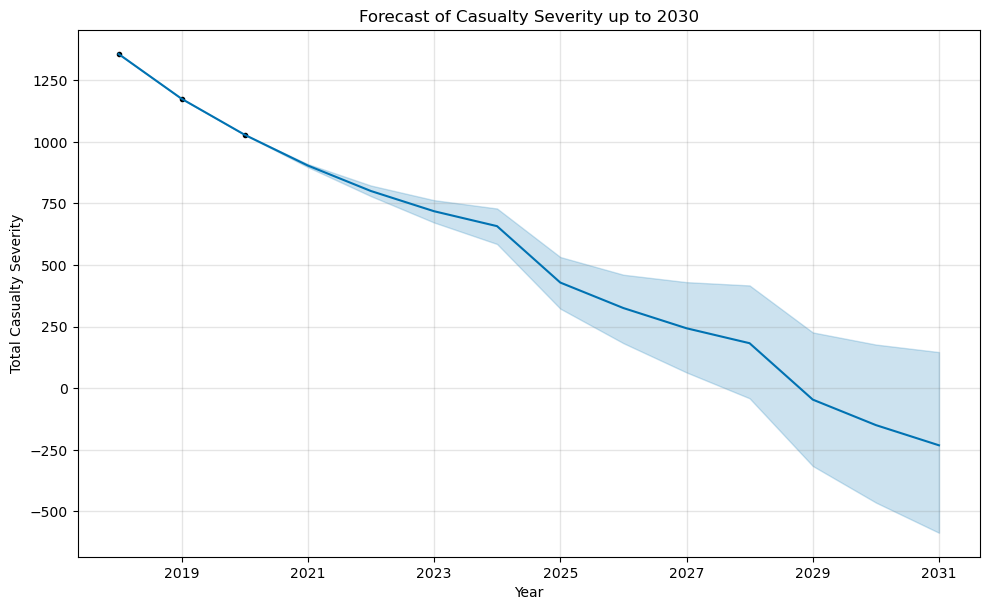

Predicted total casualty severity for 2030: -231.74213496509134


In [242]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

annual_data = df.groupby('accident_year')['casualty_severity_numeric'].sum().reset_index()


annual_data = annual_data[annual_data['accident_year'] >= 2018]

# Rename columns for Prophet compatibility
annual_data.columns = ['ds', 'y']

# Convert 'ds' to datetime format
annual_data['ds'] = pd.to_datetime(annual_data['ds'], format='%Y')

# Initializing and fiting the model
model = Prophet()
model.fit(annual_data)


future = model.make_future_dataframe(periods=(2030 - annual_data['ds'].dt.year.max() + 1), freq='Y')

# Forecasting
forecast = model.predict(future)

model.plot(forecast)
plt.title('Forecast of Casualty Severity up to 2030')
plt.xlabel('Year')
plt.ylabel('Total Casualty Severity')
plt.show()

# Extracting forecast for 2030
forecast_2030 = forecast[forecast['ds'].dt.year == 2030]['yhat'].values[0]
print(f"Predicted total casualty severity for 2030: {forecast_2030}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Imputer
import matplotlib.pyplot as plt



# One-Hot Encoding Categorical Variables
df_encoded = pd.get_dummies(df)

# Impute missing values in the encoded DataFrame using Imputer
imputer = Imputer(strategy='mean')  
df_imputed = imputer.fit_transform(df_encoded)

# Scale the Imputed Data
scaler = StandardScaler()
scaled_df_imputed = scaler.fit_transform(df_imputed)

# Apply PCA
pca = PCA()
pca.fit(scaled_df_imputed)

# Explained Variance
explained_variance = pca.explained_variance_ratio_

# Plotting the Explained Variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
